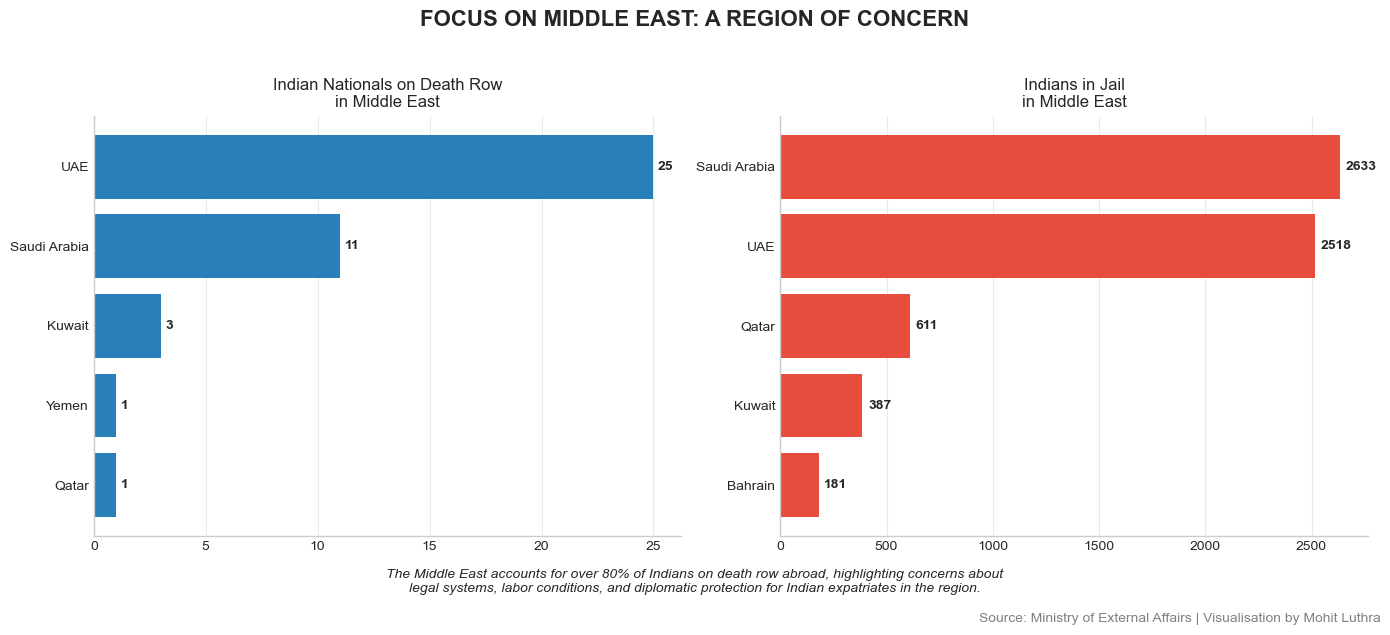

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# Set plot aesthetics for an Economist-inspired look
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.style.use('seaborn-v0_8-whitegrid')


death_sentence_data = pd.read_excel("death_sentence.xlsx")  
death_sentence_data.columns = ["Country", "Number"]


foreign_jails_data = pd.read_excel("Indian_Prisoners.xlsx")  
foreign_jails_data.columns = ["Country", "Number"]


# Create DataFrames
death_sentence_df = pd.DataFrame(death_sentence_data)
foreign_jails_df = pd.DataFrame(foreign_jails_data)

# 1. BASIC ANALYSIS
# Total prisoners
total_death_sentences = death_sentence_df['Number'].sum()
total_in_foreign_jails = foreign_jails_df['Number'].sum()

# 2. PERCENTAGE ANALYSIS
# Death sentence percentage by country
death_sentence_df['Percentage'] = (death_sentence_df['Number'] / total_death_sentences * 100).round(1)

# Foreign jail percentage by country
foreign_jails_df['Percentage'] = (foreign_jails_df['Number'] / total_in_foreign_jails * 100).round(1)

# 3. TOP 10 COUNTRIES
top10_death = death_sentence_df.sort_values('Number', ascending=False).head(10)
top10_jails = foreign_jails_df.sort_values('Number', ascending=False).head(10)

# 4. REGIONAL DISTRIBUTION
# Define regions for countries
regions = {
    'Middle East': ['UAE', 'Saudi Arabia', 'Kuwait', 'Qatar', 'Bahrain', 'Yemen'],
    'Southeast Asia': ['Malaysia', 'Indonesia', 'Brunei Darussalam', 'Cambodia', 'Singapore'],
    'East Asia': ['China', 'Japan', 'South Korea', 'Taiwan'],
    'South Asia': ['Bangladesh', 'Bhutan', 'Nepal', 'Sri Lanka'],
    'Central Asia': ['Armenia', 'Azerbaijan', 'Belarus'],
    'Africa': ['Angola', 'Congo', "Cote d'Ivoire", 'Egypt'],
    'Europe': ['Belgium', 'Croatia', 'Cyprus', 'Denmark'],
    'Oceania': ['Australia'],
    'North America': ['USA', 'Canada'],
    'South America': ['Argentina', 'Chile', 'Cuba']
}

# Function to get region for a country
def get_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

# Add region to the dataframes
death_sentence_df['Region'] = death_sentence_df['Country'].apply(get_region)
foreign_jails_df['Region'] = foreign_jails_df['Country'].apply(get_region)

# Regional aggregation
region_death = death_sentence_df.groupby('Region')['Number'].sum().reset_index()
region_death['Percentage'] = (region_death['Number'] / total_death_sentences * 100).round(1)
region_death = region_death.sort_values('Number', ascending=False)

region_jails = foreign_jails_df.groupby('Region')['Number'].sum().reset_index()
region_jails['Percentage'] = (region_jails['Number'] / total_in_foreign_jails * 100).round(1)
region_jails = region_jails.sort_values('Number', ascending=False)

def create_middle_east_focus():
    # Filter for just Middle East countries
    me_death = death_sentence_df[death_sentence_df['Region'] == 'Middle East'].sort_values('Number', ascending=True)
    me_jails = foreign_jails_df[foreign_jails_df['Region'] == 'Middle East'].sort_values('Number', ascending=True)
    
    # Create a 1x2 subplot with different scales
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Death sentences in Middle East - horizontal bar
    ax1.barh(me_death['Country'], me_death['Number'], color='#2980B9', alpha=1)
    
    # Customize first subplot
    ax1.set_title('Indian Nationals on Death Row\nin Middle East', fontsize=12)
    ax1.grid(axis='x', alpha=0.4)
    ax1.yaxis.grid(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Add data labels
    for i, v in enumerate(me_death['Number']):
        ax1.text(v + 0.2, i, str(v), va='center',fontweight='bold' )
    
    # Foreign jails in Middle East - horizontal bar
    ax2.barh(me_jails['Country'], me_jails['Number'], color='#E74C3C', alpha=1)
    
    # Customize second subplot
    ax2.set_title('Indians in Jail\nin Middle East', fontsize=12)
    ax2.grid(axis='x', alpha=0.4)
    ax2.grid(axis='y', alpha=0)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    # Add data labels
    for i, v in enumerate(me_jails['Number']):
        ax2.text(v + (max(me_jails['Number']) * 0.01), i, str(v), va='center',fontweight='bold')
    
    # Add a title for the entire figure
    fig.suptitle('FOCUS ON MIDDLE EAST: A REGION OF CONCERN', fontsize=16, fontweight='bold', y=0.98)
    
    # Add explanatory note
    fig.text(0.5, 0.01, 
             "The Middle East accounts for over 80% of Indians on death row abroad, highlighting concerns about\nlegal systems, labor conditions, and diplomatic protection for Indian expatriates in the region.",
             ha='center', fontsize=10, style='italic')
    # Add source and credit
    fig.text(0.99, -0.04, "Source: Ministry of External Affairs | Visualisation by Mohit Luthra", ha='right', fontsize=10, color='gray')
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
    plt.close()

create_middle_east_focus()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# Set plot aesthetics for an Economist-inspired look
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.style.use('seaborn-v0_8-whitegrid')


death_sentence_data = pd.read_excel("death_sentence.xlsx")  
death_sentence_data.columns = ["Country", "Number"]


foreign_jails_data = pd.read_excel("Indian_Prisoners.xlsx")  
foreign_jails_data.columns = ["Country", "Number"]


# Create DataFrames
death_sentence_df = pd.DataFrame(death_sentence_data)
foreign_jails_df = pd.DataFrame(foreign_jails_data)

# 1. BASIC ANALYSIS
# Total prisoners
total_death_sentences = death_sentence_df['Number'].sum()
total_in_foreign_jails = foreign_jails_df['Number'].sum()

# 2. PERCENTAGE ANALYSIS
# Death sentence percentage by country
death_sentence_df['Percentage'] = (death_sentence_df['Number'] / total_death_sentences * 100).round(1)

# Foreign jail percentage by country
foreign_jails_df['Percentage'] = (foreign_jails_df['Number'] / total_in_foreign_jails * 100).round(1)

# 3. TOP 10 COUNTRIES
top10_death = death_sentence_df.sort_values('Number', ascending=False).head(10)
top10_jails = foreign_jails_df.sort_values('Number', ascending=False).head(10)

# 4. REGIONAL DISTRIBUTION
# Define regions for countries
regions = {
    'Middle East': ['UAE', 'Saudi Arabia', 'Kuwait', 'Qatar', 'Bahrain', 'Yemen'],
    'Southeast Asia': ['Malaysia', 'Indonesia', 'Brunei Darussalam', 'Cambodia', 'Singapore'],
    'East Asia': ['China', 'Japan', 'South Korea', 'Taiwan'],
    'South Asia': ['Bangladesh', 'Bhutan', 'Nepal', 'Sri Lanka'],
    'Central Asia': ['Armenia', 'Azerbaijan', 'Belarus'],
    'Africa': ['Angola', 'Congo', "Cote d'Ivoire", 'Egypt'],
    'Europe': ['Belgium', 'Croatia', 'Cyprus', 'Denmark'],
    'Oceania': ['Australia'],
    'North America': ['USA', 'Canada'],
    'South America': ['Argentina', 'Chile', 'Cuba']
}

# Function to get region for a country
def get_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

# Add region to the dataframes
death_sentence_df['Region'] = death_sentence_df['Country'].apply(get_region)
foreign_jails_df['Region'] = foreign_jails_df['Country'].apply(get_region)

# Regional aggregation
region_death = death_sentence_df.groupby('Region')['Number'].sum().reset_index()
region_death['Percentage'] = (region_death['Number'] / total_death_sentences * 100).round(1)
region_death = region_death.sort_values('Number', ascending=False)

region_jails = foreign_jails_df.groupby('Region')['Number'].sum().reset_index()
region_jails['Percentage'] = (region_jails['Number'] / total_in_foreign_jails * 100).round(1)
region_jails = region_jails.sort_values('Number', ascending=False)

def create_percentage_chart():
    # Create a treemap for top countries by percentage
    # Use only countries with more than 2% of the total
    jail_percent = foreign_jails_df[foreign_jails_df['Percentage'] >= 2].copy()
    
    # Create a custom colormap
    colors = ['#F8F9F9', '#E5E7E9', '#D6DBDF', '#ABB2B9', '#808B96', '#566573', '#2C3E50']
    jail_colors = LinearSegmentedColormap.from_list('jail_cm', colors)
    
    # Create a treemap with Plotly
    fig = px.treemap(jail_percent, 
                   path=['Country'],
                   values='Number',
                   color='Percentage',
                   color_continuous_scale='Blues',
                   title='Countries with Significant Numbers of Indian Prisoners (>2% of total)',
                   )
    
    fig.update_layout(
        font_family="Palatino",
        title_font_size=20,
        title_x=0.5,
        margin=dict(t=50, l=25, r=25, b=25),
    )
    
    # This will generate an HTML file you can view
    fig.write_html('treemap_percentage.html')

# Call the function to generate the files
create_percentage_chart()